In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
years = {}
for y in range(13,23):
    years[y] = pd.read_csv("FIDEmarch"+str(y)+".csv")

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (7,8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
years[20].head()

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,MAR20,Gms,K,B-day,Flag,Column1
0,25121731.0,A C J John ...,IND,M,NaN,NaN,NaN,NaN,1063.0,0.0,40.0,1987.0,NaN,NaN
1,35077023.0,A Chakravarthy ...,IND,M,NaN,NaN,NaN,NaN,1151.0,0.0,40.0,1986.0,i,NaN
2,10207538.0,"A E M, Doshtagir ...",BAN,M,NaN,NaN,NaN,NaN,1840.0,0.0,40.0,1974.0,i,NaN
3,10680810.0,"A hamed Ashraf, Abdallah ...",EGY,M,NaN,NaN,NaN,NaN,1728.0,0.0,40.0,2001.0,NaN,NaN
4,5716365.0,"A Hamid, Harman ...",MAS,M,NI,NaN,NaN,NaN,1325.0,0.0,40.0,1970.0,i,NaN


In [4]:
years[13]['Sex'].value_counts()

M    142591
F     13668
Name: Sex, dtype: int64

In [5]:
gender_list = [y['Sex'].value_counts() for y in years.values()]
gender = pd.concat(gender_list, axis=1)
gender.columns = list(range(2013,2023))

In [6]:
gender_list_normalized = [y['Sex'].value_counts(normalize=True) for y in years.values()] 
gender_normalized = pd.concat(gender_list_normalized, axis=1)
gender_normalized.columns = list(range(2013,2023))

In [12]:
gender_normalized[2013]

M    0.91253
F    0.08747
Name: 2013, dtype: float64

In [23]:
gender.transpose().head()

,M,F
2013,142591,13668
2014,159085,15704
2015,183263,19135
2016,213720,23250
2017,242968,27300


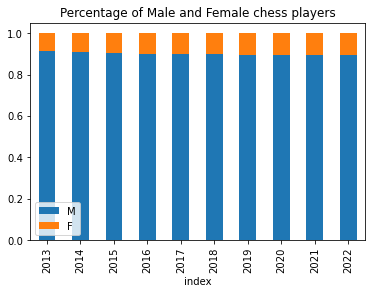

In [27]:
# sns.lineplot(data=gender_normalized.loc['M'])
# sns.barplot(data=gender_normalized)
gender_normalized.transpose().reset_index().plot(x = 'index',
    kind = 'bar',
    stacked = True,
    title = 'Percentage of Male and Female chess players',
    mark_right = True)